In [1]:
# Loading in the json file from inference
import json
import os

with open('data/test/single_img_annotations.json') as f:
    img_data = json.load(f)
    
len(img_data['annotations'])

14

In [2]:
from pycococreatortools import pycococreatortools
import datetime
import numpy as np

In [3]:
# meta data for COCO
INFO = {
    "description": "Test Dataset",
    "url": "",
    "version": "0.1.0",
    "year": 2019,
    "contributor": "",
    "date_created": datetime.datetime.now().isoformat(' ')
}

LICENSES = [
    {
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike License",
        "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/"
    }
]

CATEGORIES = [
    {
        'id': 1,
        'name': 'people',
        'supercategory': 'people',
    },
]

image_id = 1
image_info = pycococreatortools.create_image_info(
                image_id, img_data['img_path'], img_data['img_size'])

In [1]:
annotation_file_path = 'data/test/coco_annotation.json'

In [4]:
# Constructing the training annotations in COCO format
coco_output = {
    "info": INFO,
    "licenses": LICENSES,
    "categories": CATEGORIES,
    "images": [image_info],
    "annotations": []
}

segmentation_id = 1
for annotation in img_data['annotations']:
    category_info = {'id': annotation['pred_classes'], 'is_crowd': 0}
    annotation_info = pycococreatortools.create_annotation_info(
        segmentation_id,
        image_id,
        category_info,
        np.array(annotation['pred_masks']),
        img_data['img_size'],
        tolerance=2,
        bounding_box=np.array(annotation['pred_boxes'])
    )
    if annotation_info is not None:
        coco_output["annotations"].append(annotation_info)

    segmentation_id = segmentation_id + 1
    
# COCO takes in a file path, need to save json first
with open(annotation_file_path, 'w') as f:
    json.dump(coco_output, f)

In [2]:
from pycocotools.coco import COCO
import cv2
import matplotlib.pyplot as plt

In [3]:
# Create COCO object
test_coco = COCO(annotation_file_path)
image_data = test_coco.loadImgs(1)[0]

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


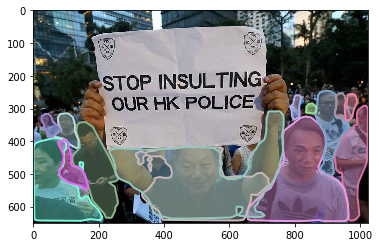

In [20]:
# Show the image with annotations
# Annotations shown, means the contructed json is ok
im = cv2.imread(image_data['file_name'])
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
annotation_ids = test_coco.getAnnIds(imgIds=image_data['id'], catIds=[0], iscrowd=None)
annotations = test_coco.loadAnns(annotation_ids)
test_coco.showAnns(annotations)